# Version 1 of Implementation: Using Tensorflow

To first train and run the model on a relatively easy neural network, I'll be using TensorFlow. This provides me with a starting point, whereby I can reach the goals outlined for the first version of this project. 

I will run the handwriting data on a basic implementation of a TensorFlow neural network, assess the success metrics that I've outlined in the issue titled "Version 1", and aim to implement more complex models in future versions.

**Import Statements**

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import PIL.Image

**Data Preperation**

I'm starting off this notebook by loading, cleaning, and labelling handwriting data from the Hands PD (linked in the README file in this repository).

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/My Drive/Spiral_HandPD", labels='inferred', label_mode='int',
    color_mode='rgb', image_size = (180, 180), shuffle = True, 
    validation_split=0.2,
    subset="training", seed = 1337)

Found 368 files belonging to 2 classes.
Using 295 files for training.


In [4]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/My Drive/Spiral_HandPD", labels='inferred', label_mode='int',
    color_mode='rgb', image_size = (180, 180), shuffle = True, 
    validation_split=0.2,
    subset="validation", seed = 1337)

Found 368 files belonging to 2 classes.
Using 73 files for validation.


## Standardizing the data

In [7]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))


## Visualizing the initial datasets

In the titles shown below, 0 represents healthy spirals, and 1 represents patient spirals. There are some clear distinctions that can be seen by eye between the patient and the healthy spirals-- mainly that there is more noticeable tremors in the spirals drawn by Alzhimer's patients, and spirals drawn by healthy individuals more closely follow the spiral outlined in black.

Some of the healthy and patient spirals do look similar, especially when the tremors are minimal.

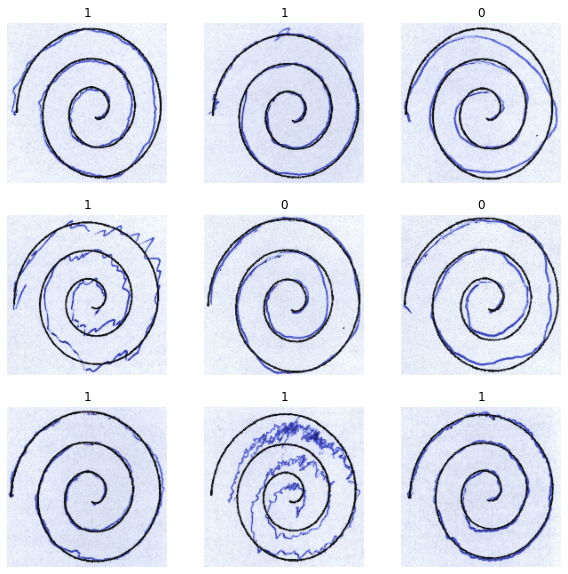

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(tf.squeeze(images[i].numpy().astype("uint8")))
        plt.title(int(labels[i]))
        plt.axis("off")

In [18]:
print(type(train_dataset))

for images, labels in train_dataset.take(2):
  print(images.get_shape)

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
<bound method _EagerTensorBase.get_shape of <tf.Tensor: shape=(32, 180, 180, 3), dtype=float32, numpy=
array([[[[226.92667, 232.56   , 249.52148],
         [231.12   , 232.75555, 252.17111],
         [238.41112, 245.41112, 253.07037],
         ...,
         [249.2703 , 252.14441, 251.87775],
         [244.42888, 248.42888, 250.42894],
         [227.41446, 233.15434, 237.69221]],

        [[230.04001, 235.40001, 252.32   ],
         [233.3    , 237.1    , 249.2    ],
         [232.     , 235.8    , 247.81111],
         ...,
         [247.3334 , 249.73346, 248.93347],
         [246.06674, 251.7268 , 251.88676],
         [247.99547, 251.99547, 250.99547]],

        [[239.3926 , 243.3926 , 253.34814],
         [238.09999, 241.81111, 252.86667],
         [234.38889, 238.38889, 249.5    ],
         ...,
         [250.07384, 251.40727, 254.5369 ],
         [248.16682, 250.04451, 253.47795],
         [244.61104, 248.61104, 251.48512

## Training the model

In [18]:
from tensorflow.keras import layers
num_classes = 2

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy', 'RootMeanSquaredError'])

model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=10
)

Epoch 1/10
10/10 [==============================] - 5s 541ms/step - loss: 8.0836 - accuracy: 0.4712 - root_mean_squared_error: 16.4759 - val_loss: 1.8335 - val_accuracy: 0.8630 - val_root_mean_squared_error: 7.0122
Epoch 2/10
10/10 [==============================] - 5s 509ms/step - loss: 3.1731 - accuracy: 0.7898 - root_mean_squared_error: 8.3479 - val_loss: 0.6493 - val_accuracy: 0.8630 - val_root_mean_squared_error: 3.0597
Epoch 3/10
10/10 [==============================] - 5s 503ms/step - loss: 0.5239 - accuracy: 0.7932 - root_mean_squared_error: 1.7478 - val_loss: 0.5657 - val_accuracy: 0.7945 - val_root_mean_squared_error: 1.3065
Epoch 4/10
10/10 [==============================] - 5s 497ms/step - loss: 0.3101 - accuracy: 0.8644 - root_mean_squared_error: 2.2849 - val_loss: 0.2897 - val_accuracy: 0.8493 - val_root_mean_squared_error: 2.1898
Epoch 5/10
10/10 [==============================] - 5s 512ms/step - loss: 0.2081 - accuracy: 0.9051 - root_mean_squared_error: 2.0940 - val_los

## Notes from this initial model

This initial implementation of the model is inspired by the Keras documentation example provided [here](https://www.tensorflow.org/tutorials/load_data/images#download_the_flowers_dataset). There is one input layer, four hidden layers, and one output layer in the example shown in that link. When this was implemented, the accuracy of the model (with three epochs of training) was 0.83. The accuracy remained constant with five epochs of training.

I started off by rescaling the input so that values are between 0 and 1, rather than between 0 and 256. This ensures that the image color does not impact any decisions made in training the model, adjusting weights, and modifying the cost function, since the color does not play a role in the labelling of data.

The hidden layers used here are 2D convolutions, because the input into the model is an image. The maximum value of the convolution is then used as inputs into further hidden layers.

The activation function used in the hidden layers of this model is the "Rectified Linear Unit" activation function. I chose this as part of my initial model because it is generally used as the first pass to get a high accuracy model, and overcomes issues such as the vanishing gradient problem. Put simply, this problem arises with sigmoidal activation functions, because it is not very sensitive at high error values, resulting in high saturation and low sensitivity for changes made to the cost model.

Decreasing the number of layers didn't significantly impact the accuracy of the model-- the accuracy stayed at ~0.84.

Increasing the number of epochs (from 5-10) slightly increased the accuracy, which was around 0.89 at the last training epoch.

I also calculated the root mean squared error as a metric to better understand the model. This value decreased as the number of epochs increased (going from 16 to 2), which is expected.
